In [7]:
from set_rcParams import set_rcParams
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
set_rcParams()

In [8]:
data_path = "particle_study/"
num_elems = 100
particles_per_element = [10, 100, 1000, 10000]


pot_l2_errors = []
pot_linf_errors = []

density_l2_errors = []
density_linf_errors = []

x_vals = []
num_seeds = 10
for i in range(num_seeds):
  curr_dir = f"/run_{i:d}"
  pot_l2_error =[]
  pot_linf_error =[]


  density_l2_error = []
  density_linf_error = []
  for n in particles_per_element:
    temp_path = data_path + curr_dir + f"/{n:d}_ppe.csv"
    data = pd.read_csv(temp_path)

    pot_l2_error.append(data["potential_l2"].to_numpy()[0])
    density_l2_error.append(data["density_l2"].to_numpy()[0])
    x_vals.append(n)
  #
  pot_l2_errors.append(np.array(pot_l2_error))
  density_l2_errors.append(np.array(density_l2_error))


pot_l2_std = np.array(pot_l2_errors).std(axis=0)
density_l2_std = np.array(density_l2_errors).std(axis=0)

pot_l2_errors = np.array(pot_l2_errors).reshape(-1)
density_l2_errors = np.array(density_l2_errors).reshape(-1)

x_vals = np.array(x_vals).reshape(-1)


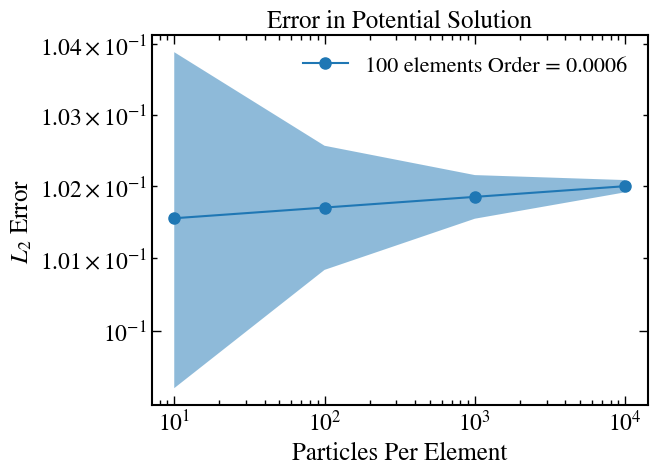

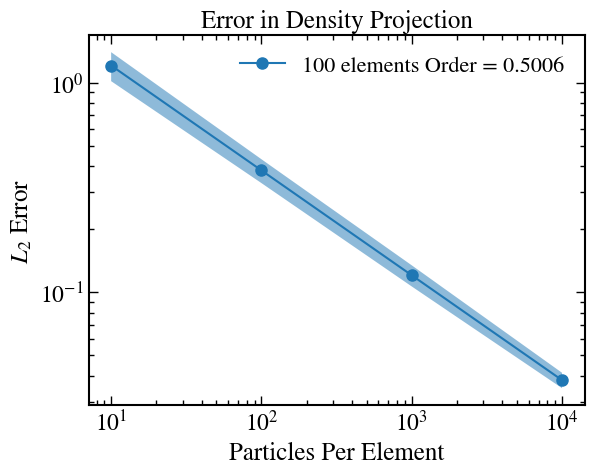

In [9]:

density_l2_model = LinearRegression().fit(np.log(x_vals).reshape((-1, 1)), np.log(np.array(density_l2_errors)))
pot_l2_model = LinearRegression().fit(np.log(x_vals).reshape((-1, 1)), np.log(np.array(pot_l2_errors)))

plot_x_vals = x_vals[:4]
density_l2_fit = np.exp(density_l2_model.predict(np.log(plot_x_vals).reshape(-1, 1)))
pot_l2_fit = np.exp(pot_l2_model.predict(np.log(plot_x_vals).reshape(-1, 1)))

plt.figure()
plt.title("Error in Potential Solution")
plt.ylabel("$L_2$ Error")
plt.xlabel("Particles Per Element")
plt.loglog(plot_x_vals, pot_l2_fit,'-o', label=f"{num_elems:d} elements Order = {np.abs(pot_l2_model.coef_[0]):0.4f}")
plt.fill_between(plot_x_vals, pot_l2_fit - pot_l2_std, pot_l2_fit + pot_l2_std, alpha=0.5)
plt.legend()
plt.show()

plt.figure()
plt.title("Error in Density Projection")
plt.ylabel("$L_2$ Error")
plt.xlabel("Particles Per Element")
plt.loglog(plot_x_vals, density_l2_fit,'-o', label=f"{num_elems:d} elements Order = {np.abs(density_l2_model.coef_[0]):0.4f}")
plt.fill_between(plot_x_vals, density_l2_fit - density_l2_std, density_l2_fit + density_l2_std, alpha=0.5)

# plt.loglog(plot_x_vals, density_l2_fit_1000ppe,'-o', label=f"1000 ppe Order = {np.abs(density_l2_model_1000ppe.coef_[0]):0.4f}")
# plt.fill_between(plot_x_vals, density_l2_fit_1000ppe - density_l2_std_1000ppe, density_l2_fit_1000ppe + density_l2_std_1000ppe, alpha=0.5)
plt.legend(loc='upper right')
plt.show()